In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  int64 
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary              141566 non-null  int64 
 5   salary_currency     141566 non-null  object
 6   salary_in_usd       141566 non-null  int64 
 7   employee_residence  141566 non-null  object
 8   remote_ratio        141566 non-null  int64 
 9   company_location    141566 non-null  object
 10  company_size        141566 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.9+ MB


In [3]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,141566.000000,1.415660e+05,141566.000000,141566.000000
mean,2024.395907,1.629719e+05,157496.750682,20.963720
std,0.677544,2.126781e+05,74132.383476,40.634986
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146147.500000,0.000000
75%,2025.000000,1.988732e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [4]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

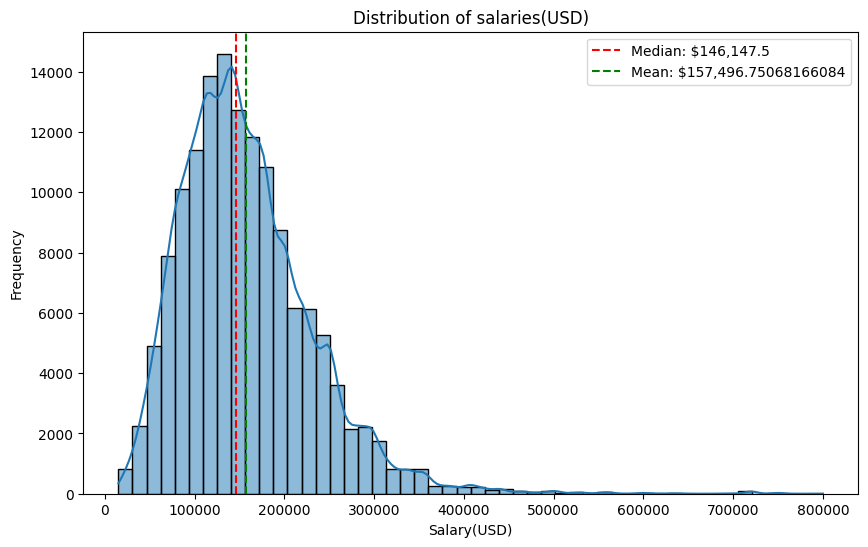

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'],kde=True, bins=50)
plt.title('Distribution of salaries(USD)')
plt.xlabel('Salary(USD)')
plt.ylabel('Frequency')
plt.axvline(df['salary_in_usd'].median(), color='red', linestyle='--', label=f'Median: ${df["salary_in_usd"].median():,}')
plt.axvline(df['salary_in_usd'].mean(), color='green', linestyle='--', label=f'Mean: ${df["salary_in_usd"].mean():,}')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

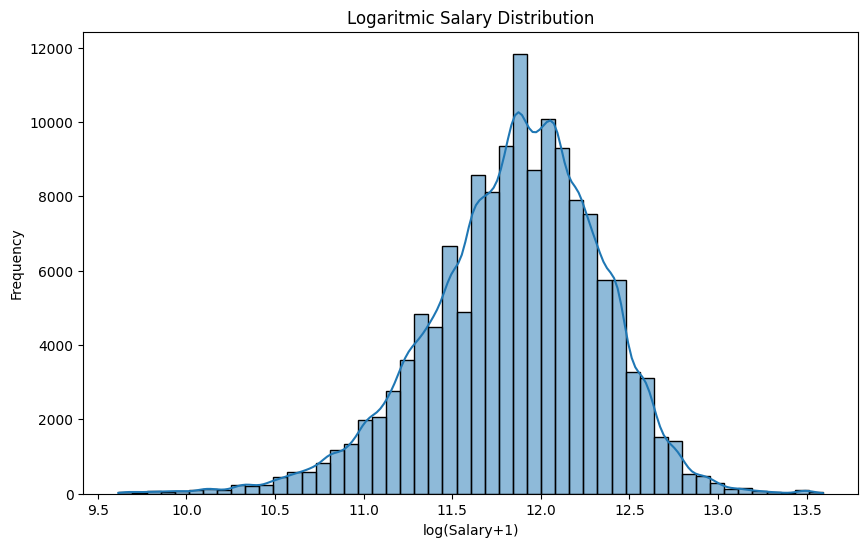

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['salary_in_usd']), kde=True, bins=50)
plt.title('Logaritmic Salary Distribution')
plt.xlabel('log(Salary+1)')
plt.ylabel('Frequency')
plt.show

distribusi gaji condong ke arah kanan, dengan jumlah signifikan pada gaji tinggi.

In [9]:
yearly_stats = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'std']).reset_index()
print(yearly_stats)

   work_year           mean    median           std
0       2020  102250.866667   79833.0  82722.309481
1       2021   99922.073394   83872.0  67072.030451
2       2022  134146.471403  131300.0  57769.407446
3       2023  153682.160371  145000.0  65393.134368
4       2024  159589.557767  148945.0  73585.575323
5       2025  156882.877845  145000.0  75766.786984


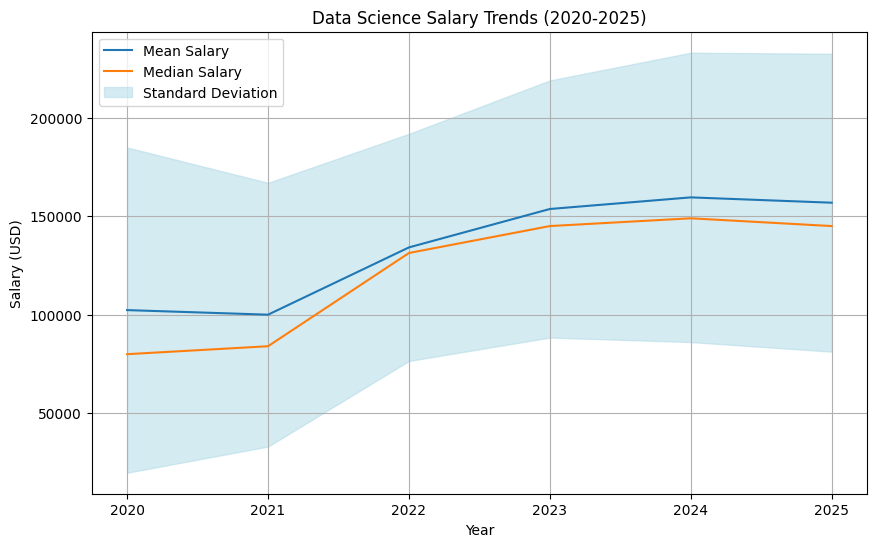

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_stats, x='work_year', y='mean', label='Mean Salary')
sns.lineplot(data=yearly_stats, x='work_year', y='median', label='Median Salary')
plt.fill_between(yearly_stats['work_year'],yearly_stats['mean'] - yearly_stats['std'], yearly_stats['mean']+yearly_stats['std'], color='lightblue', alpha=0.5, label='Standard Deviation')
plt.title('Data Science Salary Trends (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.legend()
plt.grid(True)
plt.show()

jarak antara mean dan median melebar sedikit, hal ini menandakan meningkatnya ketidaksetaraan.

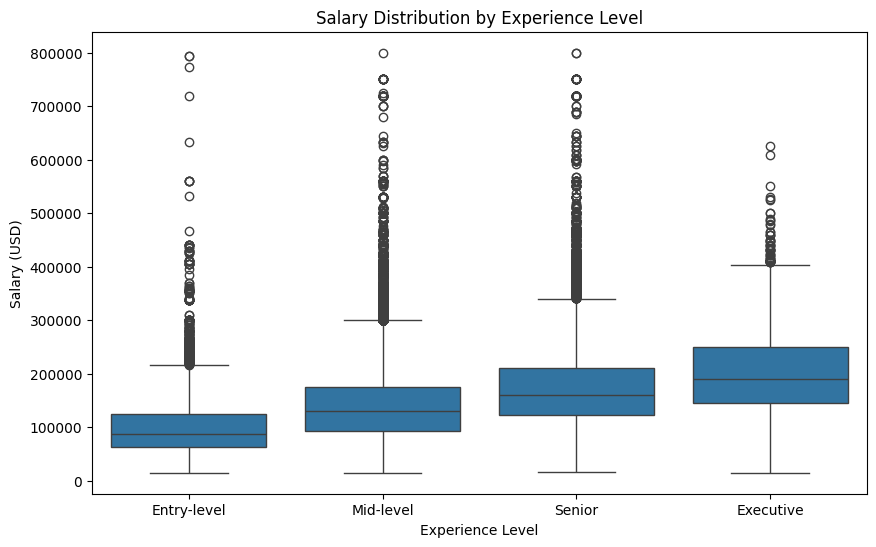

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI','SE', 'EX'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry-level', 'Mid-level', 'Senior', 'Executive'])
plt.show()

In [15]:
exp_time = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()
exp_time['experience_level'] = exp_time['experience_level'].replace({
    'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior', 'EX': 'Executive'
})

print(exp_time)

    work_year experience_level  salary_in_usd
0        2020      Entry-level   69840.666667
1        2020        Executive  179958.250000
2        2020        Mid-level   91870.935484
3        2020           Senior  138648.894737
4        2021      Entry-level   63463.065217
5        2021        Executive  186128.000000
6        2021        Mid-level   86818.390805
7        2021           Senior  125989.746667
8        2022      Entry-level   79464.085470
9        2022        Executive  184738.093023
10       2022        Mid-level  102745.576602
11       2022           Senior  147715.053415
12       2023      Entry-level   90914.768240
13       2023        Executive  190692.975410
14       2023        Mid-level  123773.658125
15       2023           Senior  165421.026078
16       2024      Entry-level  103413.483751
17       2024        Executive  201624.672544
18       2024        Mid-level  145668.401710
19       2024           Senior  175703.482041
20       2025      Entry-level   9

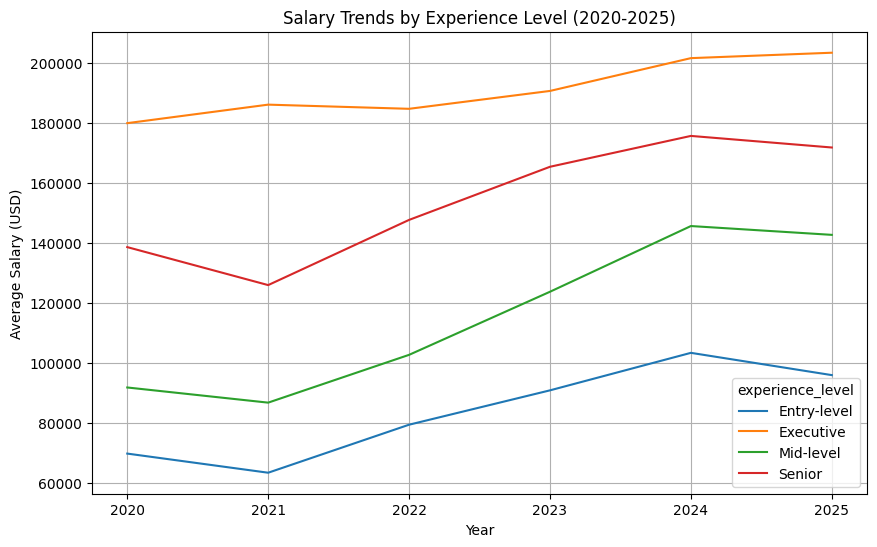

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=exp_time, x='work_year', y='salary_in_usd', hue='experience_level')
plt.title('Salary Trends by Experience Level (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

tingkat pengalaman menunjukkan perbedaan gaji, semakin baik pengalaman semakin baik gajinya.

In [17]:
top_jobs = df['job_title'].value_counts().head(15)
print("Distribution of top job titles:")
print(top_jobs)

Distribution of top job titles:
job_title
Data Scientist               17934
Software Engineer            15880
Data Engineer                15539
Data Analyst                 13087
Engineer                     10144
Machine Learning Engineer     8509
Manager                       7189
Analyst                       4792
Research Scientist            3306
Product Manager               2386
Applied Scientist             2283
Associate                     2215
Data Architect                2112
Analytics Engineer            1997
AI Engineer                   1796
Name: count, dtype: int64


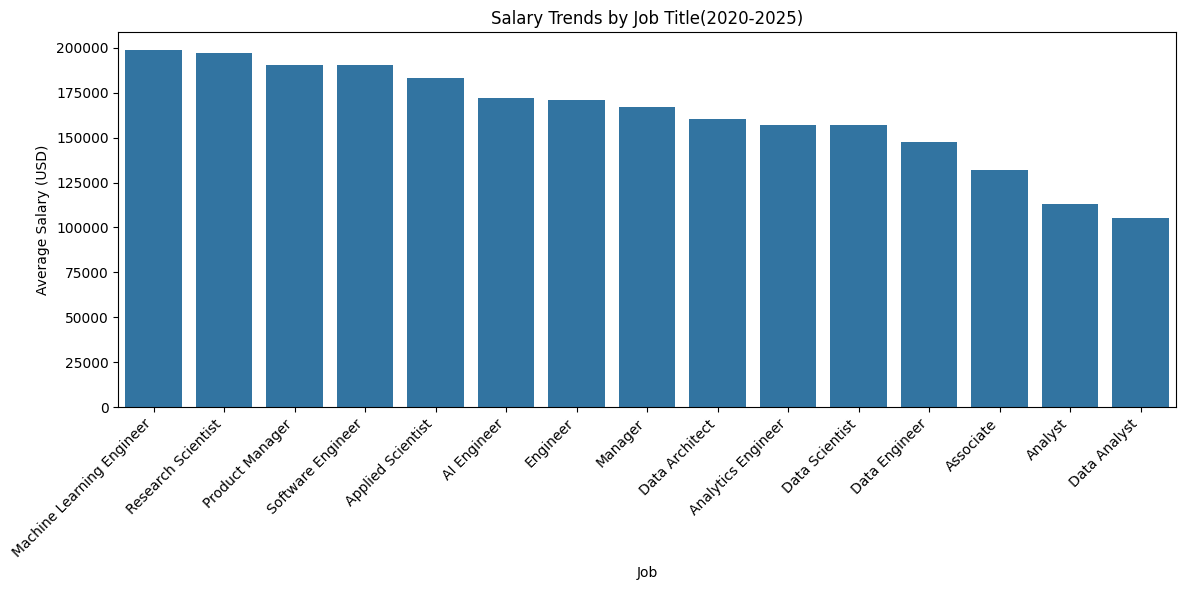

In [22]:
top_jobs_salary = df[df['job_title'].isin(top_jobs.index)].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=top_jobs_salary.index, y=top_jobs_salary.values)
plt.title('Salary Trends by Job Title(2020-2025)')
plt.xlabel('Job')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


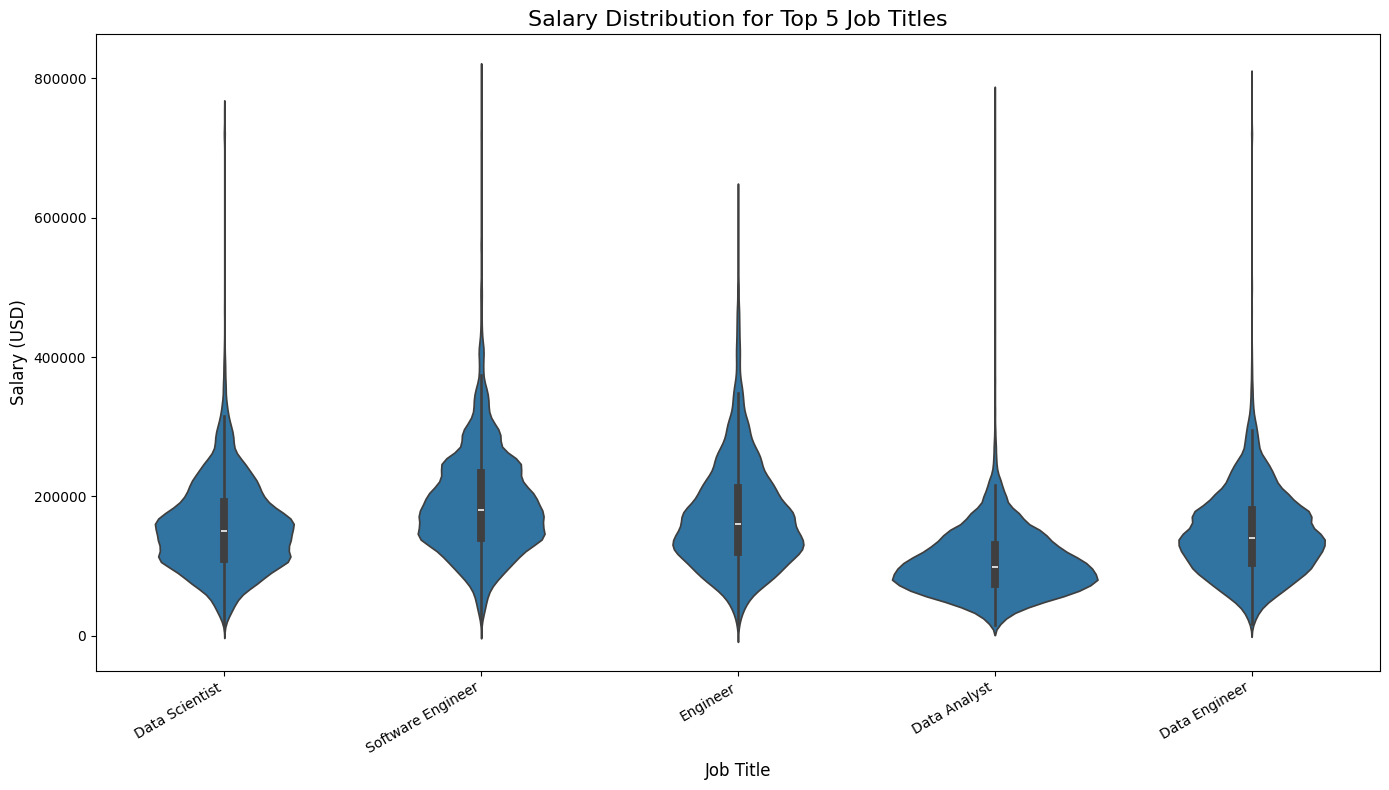

In [23]:
plt.figure(figsize=(14, 8))
top5_jobs = top_jobs.index[:5]
sns.violinplot(x='job_title', y='salary_in_usd', data=df[df['job_title'].isin(top5_jobs)])
plt.title('Salary Distribution for Top 5 Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

di semua pekerjaan Machine Learning Engineers dan Research Scientist cenderung memiliki gaji tertinggi, sementara Data Analyst cenderung bergaji rendah. Software Engineers menujukkan distribusi terlebar, menunjukkan luasnya ragam peran di pekerjaan ini.  

In [26]:
df['employee_residence'].unique()

array(['GB', 'US', 'CA', 'FR', 'DE', 'SK', 'PT', 'IN', 'CL', 'NL', 'AU',
       'MY', 'BR', 'AT', 'SV', 'CO', 'DO', 'AR', 'MX', 'GT', 'CR', 'LT',
       'ES', 'LV', 'IE', 'BE', 'ZA', 'PL', 'NO', 'FI', 'EE', 'PH', 'EG',
       'JO', 'CY', 'NZ', 'UA', 'CH', 'TH', 'JM', 'JP', 'MT', 'IT', 'MK',
       'SI', 'HK', 'LS', 'ID', 'PE', 'SG', 'HU', 'RO', 'PA', 'LU', 'DZ',
       'GR', 'KE', 'CD', 'SE', 'KR', 'TW', 'CZ', 'TR', 'NG', 'DK', 'AE',
       'BG', 'RS', 'PR', 'EC', 'XK', 'ZM', 'AM', 'RW', 'IL', 'LB', 'HR',
       'PK', 'HN', 'VE', 'BM', 'VN', 'GE', 'SA', 'OM', 'BA', 'UG', 'MU',
       'QA', 'RU', 'TN', 'GH', 'AD', 'MD', 'UZ', 'CF', 'KW', 'IR', 'AS',
       'CN', 'BO', 'IQ', 'JE'], dtype=object)

C:\Users\PC-NB\AppData\Local\Temp\ipykernel_4192\390093111.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='adjusted_salary', data=top_countries_salary, palette='viridis')


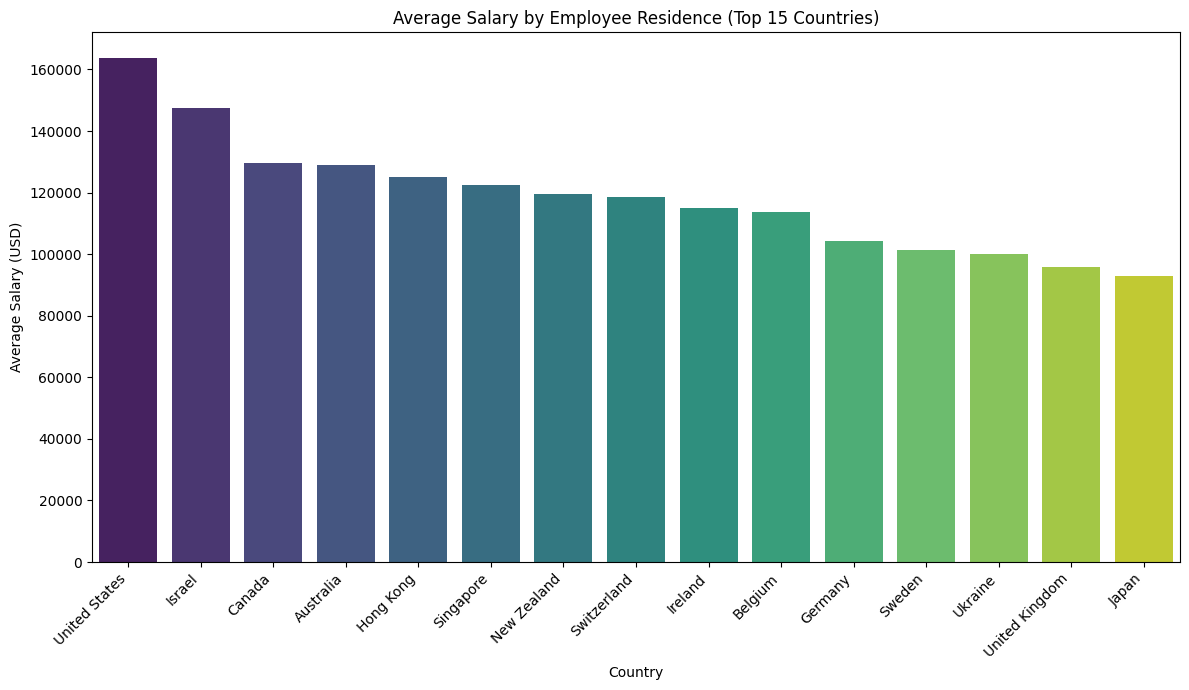

In [27]:
df['adjusted_salary']=df['salary_in_usd']
iso2_to_name = {
    'US': 'United States', 'GB': 'United Kingdom', 'DE': 'Germany', 'FR': 'France',
    'CA': 'Canada', 'IN': 'India', 'AU': 'Australia', 'ES': 'Spain', 'BR': 'Brazil',
    'NL': 'Netherlands', 'JP': 'Japan', 'CH': 'Switzerland', 'IT': 'Italy',
    'SG': 'Singapore', 'SE': 'Sweden', 'MX': 'Mexico', 'FI': 'Finland', 'DK': 'Denmark',
    'PL': 'Poland', 'PT': 'Portugal', 'NZ': 'New Zealand', 'IE': 'Ireland',
    'HK': 'Hong Kong', 'RU': 'Russia', 'BE': 'Belgium', 'IL': 'Israel',
    'UA': 'Ukraine', 'TR': 'Turkey', 'AE': 'United Arab Emirates', 'ZA': 'South Africa',
    'CO': 'Colombia', 'AR': 'Argentina', 'CL': 'Chile', 'AT': 'Austria', 'MY': 'Malaysia',
    'NG': 'Nigeria', 'VN': 'Vietnam', 'KR': 'South Korea', 'TH': 'Thailand'}

avg_salary_by_residence = df.groupby('employee_residence')['adjusted_salary'].mean().reset_index()
avg_salary_by_residence['country_name'] = avg_salary_by_residence['employee_residence'].map(iso2_to_name)
avg_salary_by_residence = avg_salary_by_residence.dropna(subset=['country_name'])

top_countries_salary = avg_salary_by_residence.sort_values(by='adjusted_salary', ascending=False).head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x='country_name', y='adjusted_salary', data=top_countries_salary, palette='viridis')
plt.title('Average Salary by Employee Residence (Top 15 Countries)')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
US, Israel, Kanada memimpin di gaji data sains.

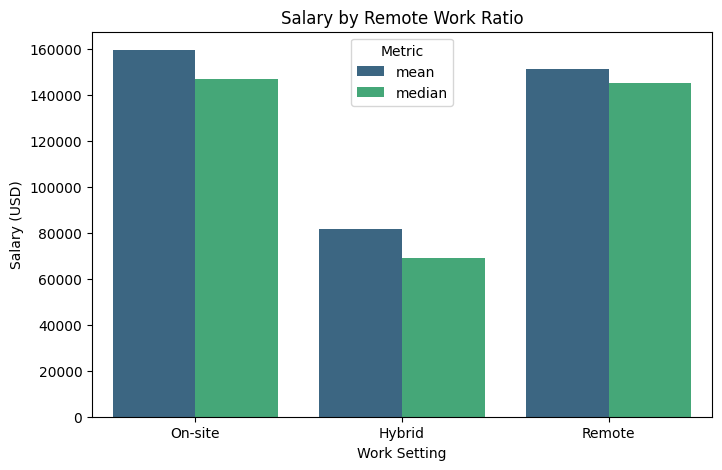

In [28]:
remote_salary = df.groupby('remote_ratio')['salary_in_usd'].agg(['mean', 'median', 'count']).reset_index()
remote_salary['remote_ratio'] = remote_salary['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

remote_salary_melted = remote_salary.melt(id_vars='remote_ratio', value_vars=['mean', 'median'], var_name='Metric', value_name='Salary (USD)')

plt.figure(figsize=(8, 5))
sns.barplot(data=remote_salary_melted, x='remote_ratio', y='Salary (USD)', hue='Metric', palette='viridis')
plt.title('Salary by Remote Work Ratio')
plt.xlabel('Work Setting')
plt.ylabel('Salary (USD)')
plt.show()

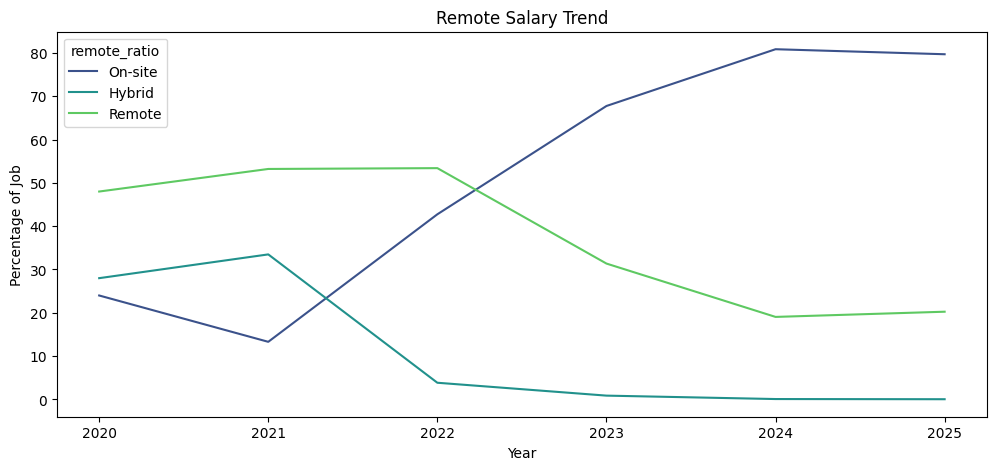

In [31]:
remote_time = df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')
total_per_year = remote_time.groupby('work_year')['count'].sum().reset_index()
remote_time = remote_time.merge(total_per_year, on='work_year', suffixes=('', '_total'))
remote_time['percentage'] = (remote_time['count'] / remote_time['count_total']) * 100
remote_time['remote_ratio'] = remote_time['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

plt.figure(figsize=(12, 5))
sns.lineplot(data=remote_time, x='work_year', y='percentage', hue='remote_ratio', palette='viridis')
plt.title('Remote Salary Trend')
plt.xlabel('Year')
plt.ylabel('Percentage of Job')
plt.show()

gaji pekerja remot cenderung menawarkan gaji lebih tinggi secara rerata. juga terlihat perpindahan ke pekerjaan remot setelah tahun 2020, dan tren ini menjadi stabil pada 2023-2024.

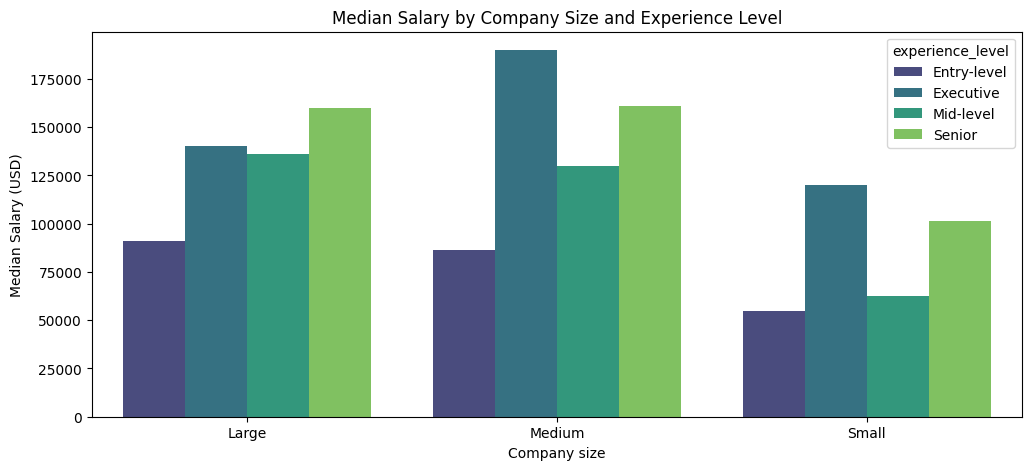

In [32]:
company_salary = df.groupby(['company_size', 'experience_level'])['salary_in_usd'].median().reset_index()
company_salary['company_size'] = company_salary['company_size'].map({'S': 'Small', 'M': 'Medium', 'L': 'Large'})
company_salary['experience_level'] = company_salary['experience_level'].map({
    'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior', 'EX': 'Executive'
})

plt.figure(figsize=(12, 5))
sns.barplot(data=company_salary, x='company_size', y='salary_in_usd', hue='experience_level', palette='viridis')
plt.title('Median Salary by Company Size and Experience Level')
plt.xlabel('Company size')
plt.ylabel('Median Salary (USD)')
plt.show()

perusahaan yang lebih besar umumnya memberikan gaji yang lebih tinggi di setiap tingkat pengalaman, dengan perbedaan paling tinggi di executive.  

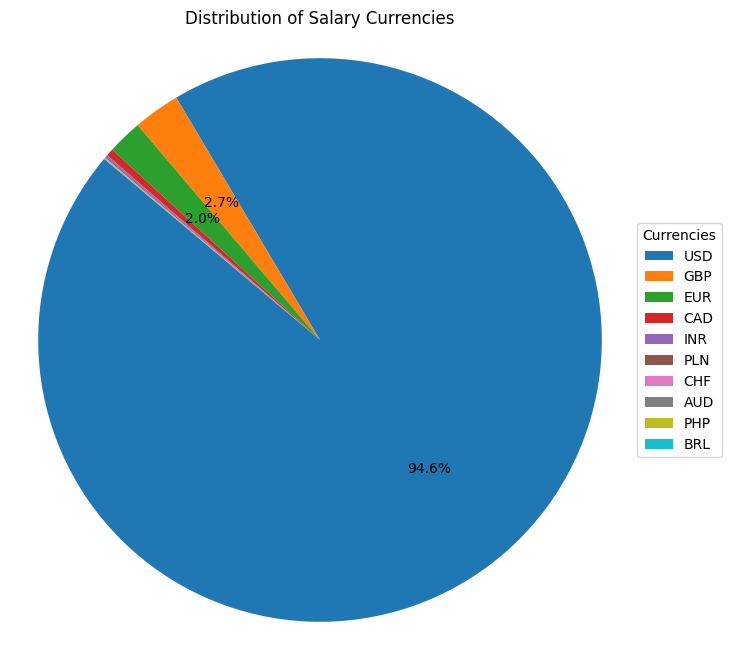

In [33]:
# Top salary currencies
currency_counts = df['salary_currency'].value_counts().head(10)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        if pct > 1:
            return '{:.1f}%'.format(pct)
        return ''
    return my_format

plt.figure(figsize=(8, 8))
plt.pie(currency_counts.values, labels=None, autopct=autopct_format(currency_counts.values), startangle=140)
plt.title('Distribution of Salary Currencies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(currency_counts.index, title="Currencies", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

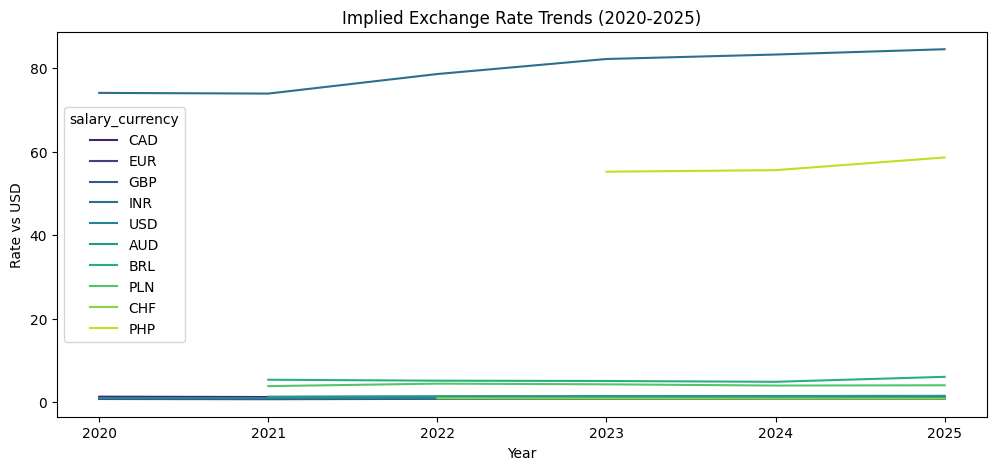

In [34]:
df['implied_exchange_rate'] = df['salary'] / df['salary_in_usd']
top_currencies = df['salary_currency'].value_counts().head(10).index.tolist()
exchange_rates = df[df['salary_currency'].isin(top_currencies)].groupby(['work_year', 'salary_currency'])['implied_exchange_rate'].median().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=exchange_rates, x='work_year', y='implied_exchange_rate', hue='salary_currency', palette='viridis')
plt.title('Implied Exchange Rate Trends (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Rate vs USD')
plt.show()

USD mendominasi kurs untuk gaji data sains. laju pertukaran menjunjukkan kekuatan kurs setiap waktu.

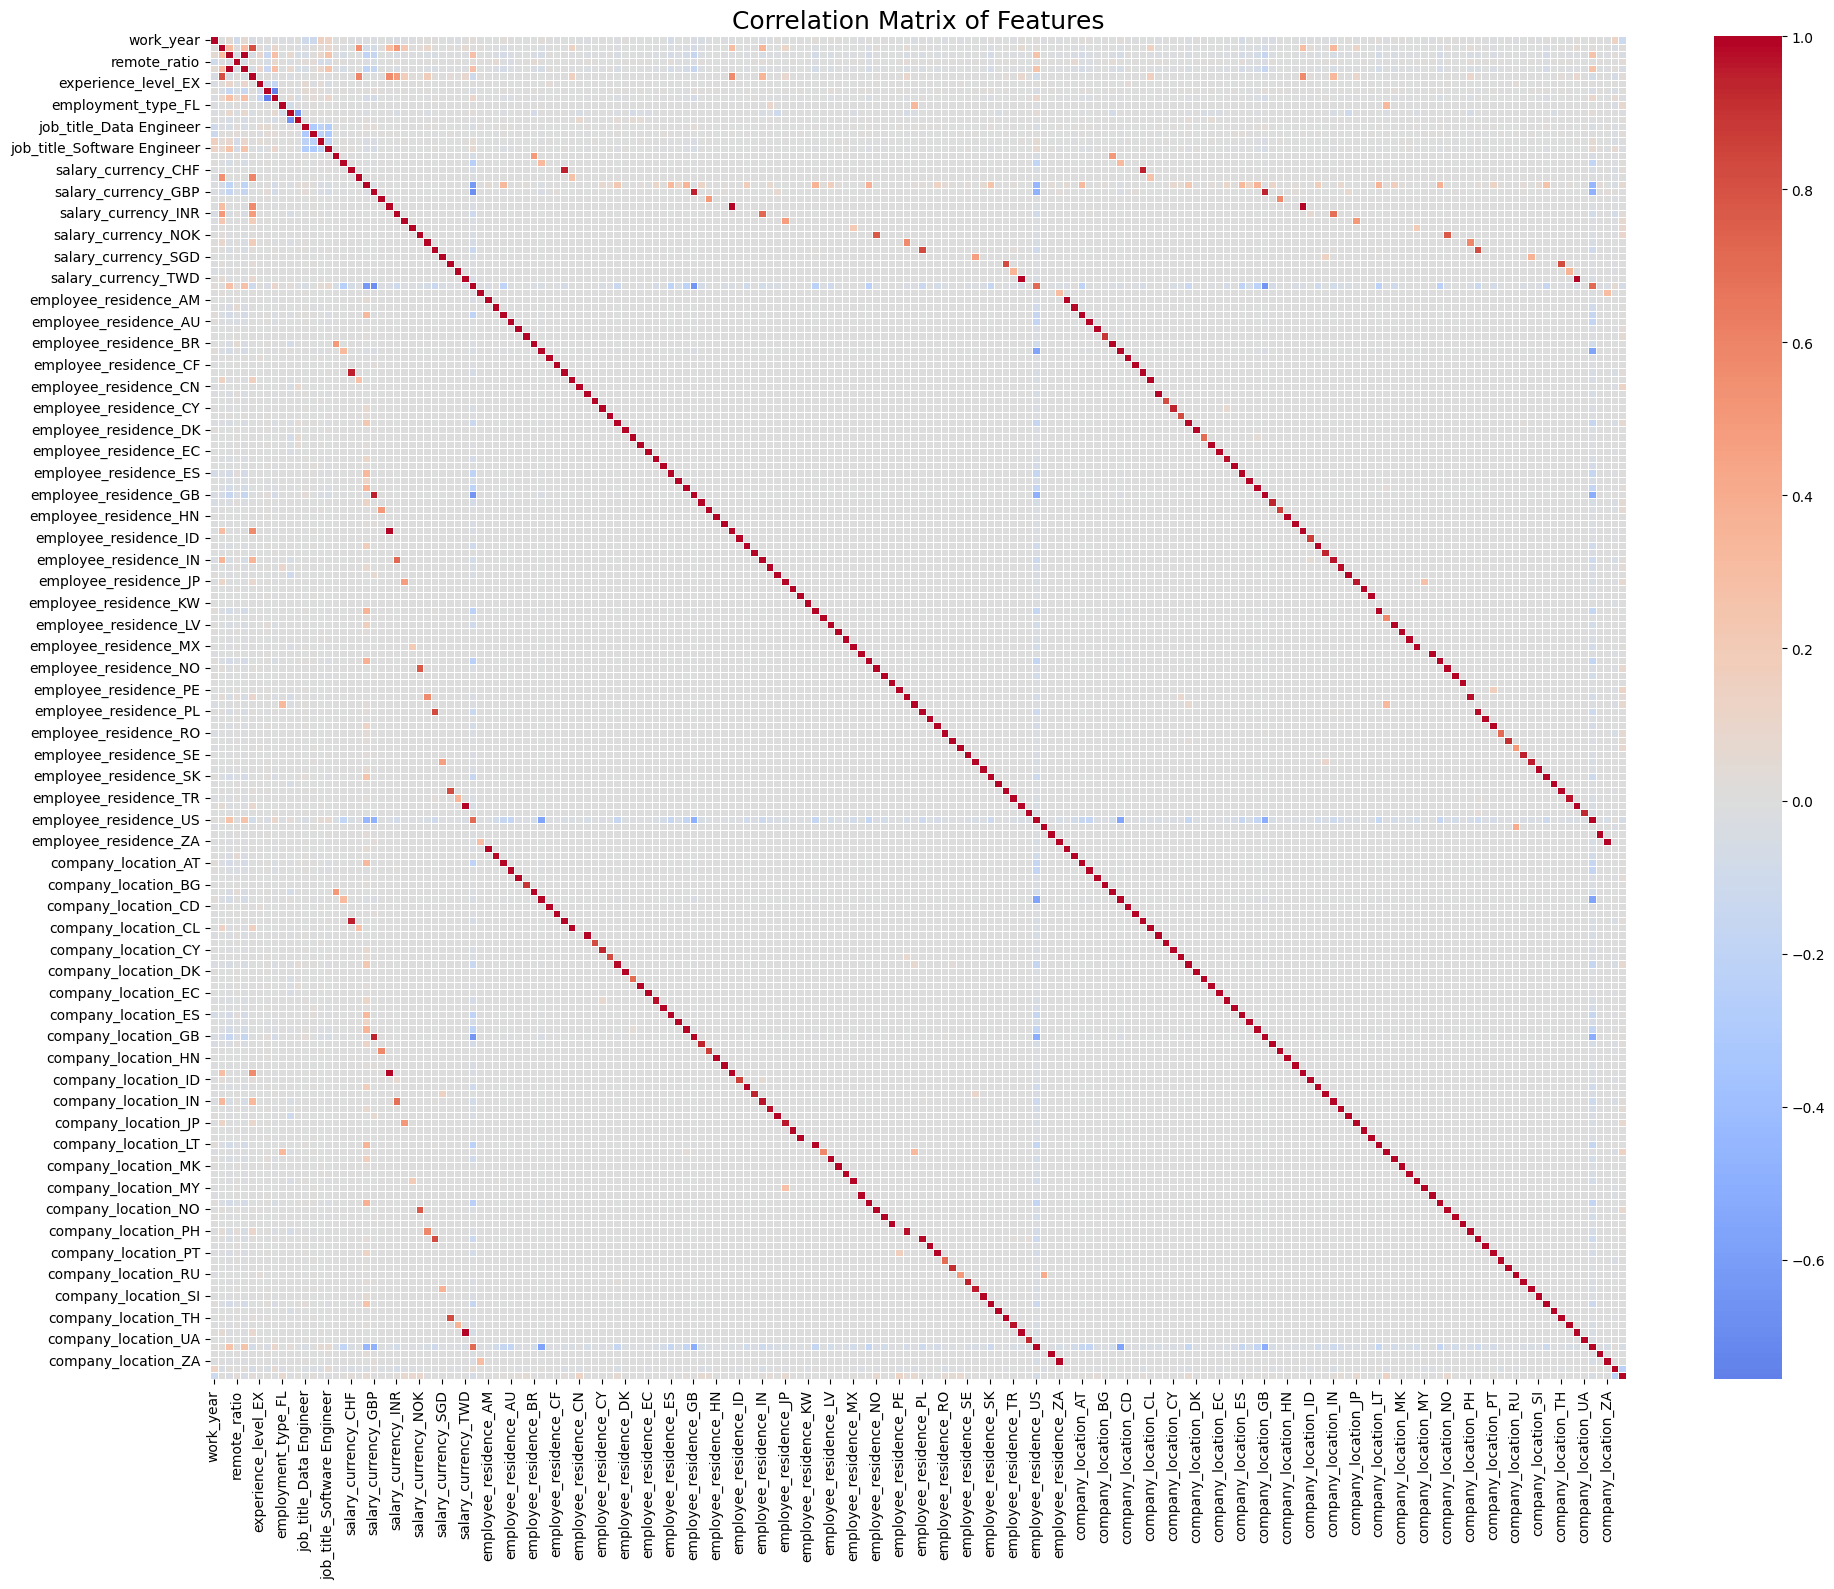

In [36]:
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 
                    'employee_residence', 'company_location', 'company_size']
numerical_cols = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

top_job_titles = df['job_title'].value_counts().head(5).index.tolist()
df_corr = df[df['job_title'].isin(top_job_titles)].copy()

df_dummies = pd.get_dummies(df_corr, columns=categorical_cols, drop_first=True)

corr_matrix = df_dummies.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [37]:
salary_corr = corr_matrix['salary_in_usd'].sort_values(ascending=False)
print("Top 10 features positively correlated with salary:")
print(salary_corr.head(11))  # Including salary_in_usd itself
print("\nTop 10 features negatively correlated with salary:")
print(salary_corr.tail(10))

Top 10 features positively correlated with salary:
adjusted_salary                1.000000
salary_in_usd                  1.000000
salary                         0.312158
experience_level_SE            0.283090
salary_currency_USD            0.273329
job_title_Software Engineer    0.263941
employee_residence_US          0.260671
company_location_US            0.259873
experience_level_EX            0.100351
job_title_Engineer             0.091414
employment_type_FT             0.067459
Name: salary_in_usd, dtype: float64

Top 10 features negatively correlated with salary:
company_location_ES     -0.069030
company_location_FR     -0.071843
employee_residence_FR   -0.072456
company_location_LT     -0.076052
employee_residence_LT   -0.076052
experience_level_MI     -0.140083
employee_residence_GB   -0.154147
company_location_GB     -0.154507
salary_currency_GBP     -0.163104
salary_currency_EUR     -0.196424
Name: salary_in_usd, dtype: float64
